<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Libraries" data-toc-modified-id="Libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Setup" data-toc-modified-id="Setup-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Dataset-Split" data-toc-modified-id="Dataset-Split-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Dataset Split</a></span></li></ul></div>

# Introduction

This notebook splits the given data into train and test sets.

# Libraries

In [1]:
import pandas as pd
from pathlib import Path
from datetime import timedelta
import matplotlib.pyplot as plt

# Setup

In [2]:
%cd ..

/tmp/trading


In [3]:
data_dir = Path("./data")

In [4]:
data_file = "bitmex_BTCUSD_candles_1m_price.csv"

# Data

Read the data and upsample to daily:

In [5]:
df = pd \
    .read_csv(data_dir/data_file, parse_dates=["Date"], index_col=["Date"]) \
    .asfreq("T") \
    .sort_index(ascending=True)
df.head()

,Open,Close,High,Low,Trades,Volume
Date,,,,,,
2017-12-31 21:00:00+00:00,14185.5,14176.0,14187.0,14170.5,51,101296
2017-12-31 21:01:00+00:00,14176.0,14117.5,14176.0,14117.5,206,453469
2017-12-31 21:02:00+00:00,14117.5,14095.5,14142.5,14069.0,438,1857761
2017-12-31 21:03:00+00:00,14095.5,14116.5,14116.5,14060.0,224,794703
2017-12-31 21:04:00+00:00,14116.5,14086.5,14144.0,14086.5,201,574565


# Dataset Split

We will be experimenting with algorithms that require no training or are trained online.

For algorithms that are trained online, we use a few days for the algorihtm to adapt to the current market condition before starting to trade.

In [6]:
num_adapt_days = 5

adapt_date_cutoff = min(df.index + timedelta(days=num_adapt_days))
adapt_date_cutoff

Timestamp('2018-01-05 21:00:00+0000', tz='UTC', freq='T')

In [7]:
train = df.query("Date <= @adapt_date_cutoff.to_datetime64()")
test = df.query("Date > @adapt_date_cutoff.to_datetime64()")

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/generic.py:407: FutureWarning: The default of the 'keep_tz' keyword will change to True in a future release. You can set 'keep_tz=True' to obtain the future behaviour and silence this warning.
  s = level_values.to_series()
/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/generic.py:415: FutureWarning: The default of the 'keep_tz' keyword will change to True in a future release. You can set 'keep_tz=True' to obtain the future behaviour and silence this warning.
  dindex = axis_index.to_series()


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7201 entries, 2017-12-31 21:00:00+00:00 to 2018-01-05 21:00:00+00:00
Freq: T
Data columns (total 6 columns):
Open      7201 non-null float64
Close     7201 non-null float64
High      7201 non-null float64
Low       7201 non-null float64
Trades    7201 non-null int64
Volume    7201 non-null int64
dtypes: float64(4), int64(2)
memory usage: 393.8 KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 839463 entries, 2018-01-05 21:01:00+00:00 to 2019-08-11 20:03:00+00:00
Freq: T
Data columns (total 6 columns):
Open      839463 non-null float64
Close     839463 non-null float64
High      839463 non-null float64
Low       839463 non-null float64
Trades    839463 non-null int64
Volume    839463 non-null int64
dtypes: float64(4), int64(2)
memory usage: 44.8 MB


/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


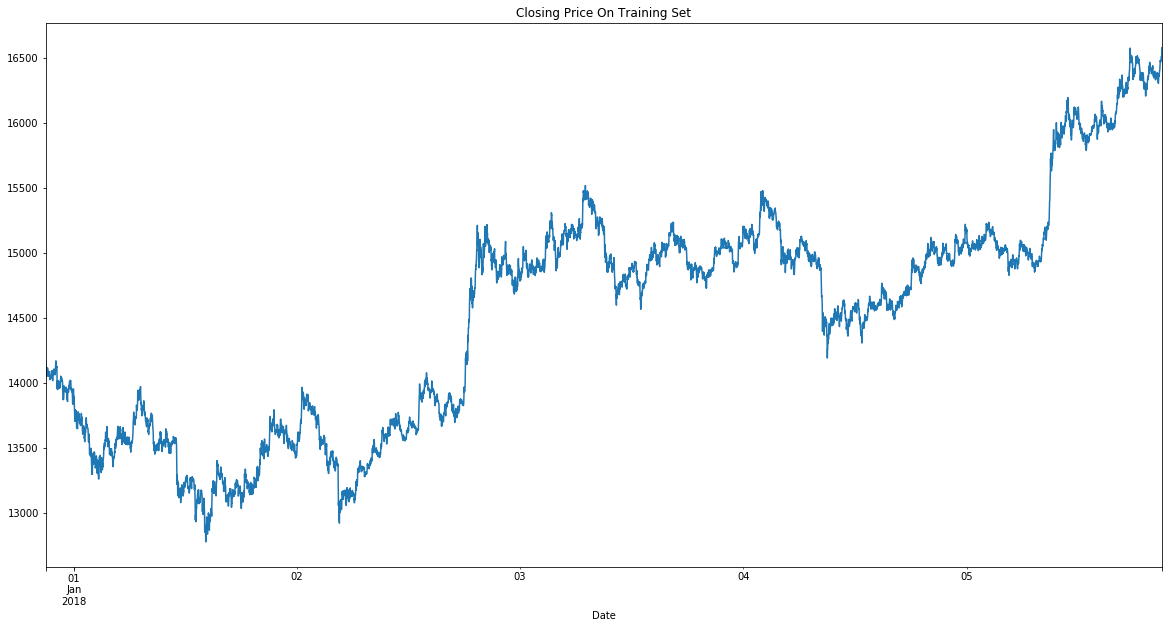

In [10]:
train["Close"].plot(figsize=(20, 10), title="Closing Price On Training Set")

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


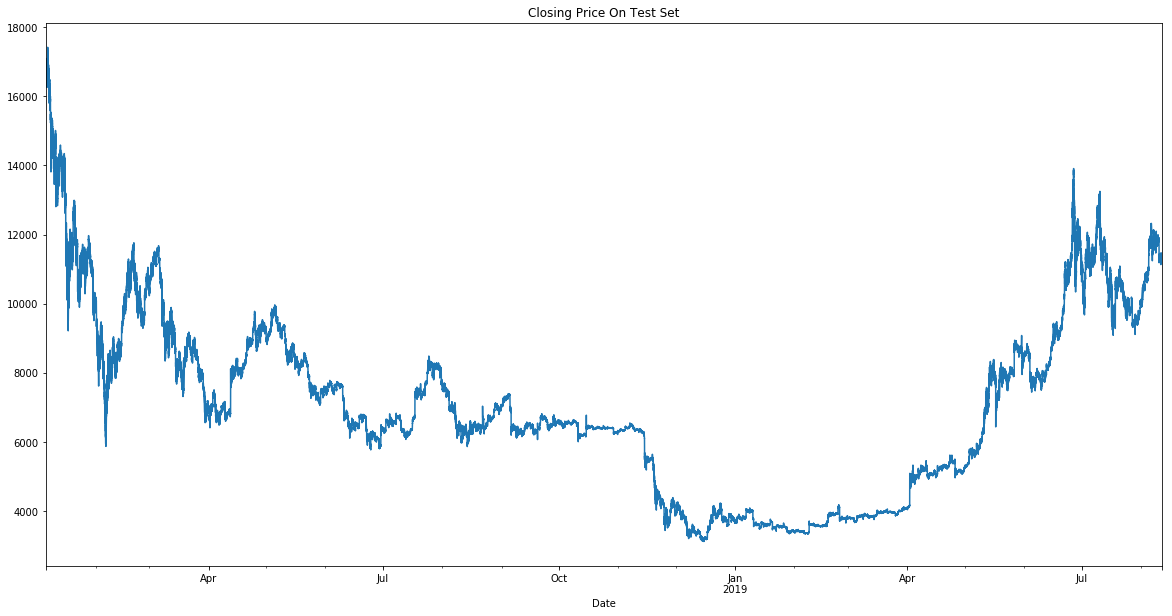

In [11]:
test["Close"].plot(figsize=(20, 10), title="Closing Price On Test Set")

Save the splits:

In [12]:
train.to_parquet(data_dir / "train.parquet")
test.to_parquet(data_dir / "test.parquet")